# Tutorial level example to making dataset and training object detector model

## Make Sushi & Banana subset

In [10]:
# Install dl-cliche in advance: $ pip install git+https://github.com/daisukelab/dl-cliche.git@master
from dlcliche.notebook import *
from od_anno import *

OIDV4 = Path('/mnt/slow_dataset/oidv4')  # Change this to your copy.
PATH = Path('sample')
SHAPE = (448, 336)

# Load dataframe based object, filter by Sushi & Banana.
od = ODAnno(OIDV4/'train_annotations.csv', OIDV4).filter_by_label_(['Sushi', 'Banana'])

# of Sushi & Banana samples. 1404
Sushi & Banana class balance = {'Banana': 1612, 'Sushi': 2088}


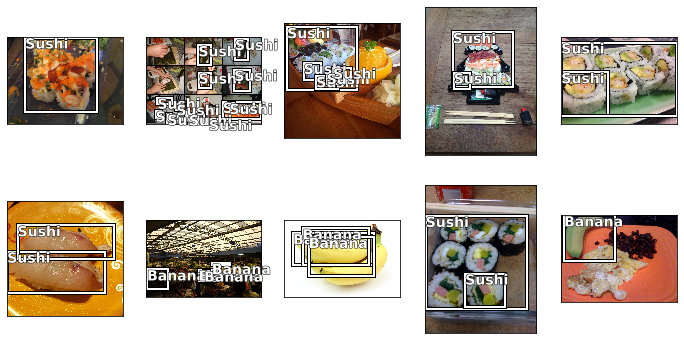

In [13]:
# Show some samples
data = od.dataset()
print('# of Sushi & Banana samples.', len(data))
print_class_balance('Sushi & Banana class balance', od.anno_df.Label)
data.show(range(10), matrixsize=(5, 2), figsize=(12,6))

In [14]:
# Write subset as dataset
PATH=Path('sample')
od.brew_subset(new_anno_csv=PATH/'annotations.csv',
               dest_folder=PATH/'images', resize_shape=SHAPE)

100%|██████████| 1404/1404 [01:49<00:00, 12.86it/s]


## Make SqueezeDetKeras training files & get config values

In [15]:
import squeeze_det_keras_utility
od = ODAnno(PATH/'annotations.csv', PATH/'images')
data = od.dataset()
squeeze_det_keras_utility.make_training_files(PATH, data, test_size=0.1)
squeeze_det_keras_utility.calc_config_shape(SHAPE)

Copy followings to squeeze.config.
"CLASS_NAMES": ["banana", "sushi"],
"CLASS_TO_IDX": {"banana": 0, "sushi": 1},
"ANCHORS_HEIGHT": 21,
"ANCHORS_WIDTH": 28,
"IMAGE_HEIGHT": 336,
"IMAGE_WIDTH": 448,


In [16]:
squeeze_det_keras_utility.optimize_anchors(data, num_anchors=9)

IoU =  0.6928742917037867
[[417.2, 302.40000000000003],
 [40.08659199999999, 31.235736000000003],
 [79.01600000000005, 38.64],
 [79.79999999999998, 110.352816],
 [121.52000000000001, 73.604328],
 [149.24, 143.079888],
 [55.29977600000001, 63.56011200000003],
 [17.92, 20.16],
 [269.629696, 171.50649599999997]]


In [6]:
! ls {PATH}

annotations.csv  gt_val.txt  img_train.txt  labels  squeeze.config
gt_train.txt	 images      img_val.txt    log


## Working with SqueezeDetKeras

### Install

- Clone SqueezeDetKeras.
```sh
git clone https://github.com/daisukelab/squeezedet-keras-plus.git
```
- Install Albumentations (augmentation library).
```sh
pip install git+https://github.com/daisukelab/albumentations.git@master
```

### Train

```sh
python squeezedet-keras-plus/scripts/train.py --init squeezedet-keras-plus/main/model/imagenet.h5 --epochs 200
```

### Validation
This will create validation result and visualizations.

```sh
python ~/lab/squeezedet-keras-plus/scripts/eval.py --epochs 200 --gpu 0
```

And run tensorboard, and open your `http://yourserver:6006`.

```sh
tensorboard --logdir log/
```

Then you can check how trained model performs.

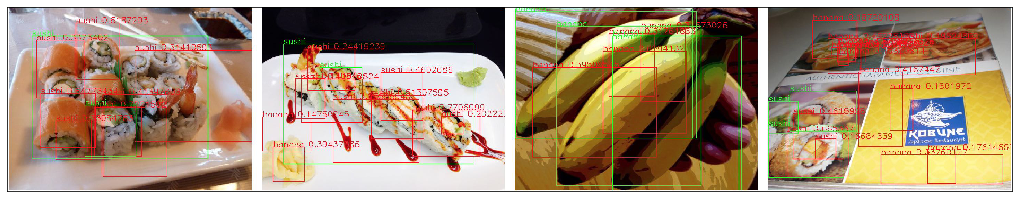

In [26]:
show_image(load_rgb_image(PATH/'sushi_banana.jpg'), figsize=(18, 5));

It's working, though something yellow seems to be all predicted as bananas.

This is the end of example, leaving a lot to improve performance...

- Dataset contains a sushi or sushis, cleaning data would be the first thing to work on.
- No hyper parameter have been tuned, there'd be a lot to do.
- etc...